### ***Chess Openings: Analyzing Sucess***

NOTE: Place .csv file into the local runtime files in Collab for data to show


# **Introduction**:

Chess, often regarded as the "Game of Kings," is a centuries-old board game that has captivated the minds of enthusiasts, scholars, and strategists alike. Beyond its entertainment value, chess offers a unique opportunity for data scientists to delve into the world of strategy, decision-making, and statistical analysis. In this project, we embark on a journey to unravel the secrets behind the success of different chess openings, leveraging the power of data science techniques to provide valuable insights into this timeless game.

# **The Chess Opening: A Critical Phase in the Game**

The opening phase of a chess game is a critical moment where players lay the foundation for their mid-game and endgame strategies. Chess openings are well-established sequences of moves that have been studied, practiced, and refined over centuries. Understanding the success of various openings can not only be enlightening for chess players but also offer valuable insights into decision-making processes and strategic planning in other domains.

# **The Objectives of the Project**

Our primary objective is to explore and analyze the success of different chess openings based on historical game data. By doing so, we aim to answer several intriguing questions:

Which chess openings are the most successful in competitive play? We will investigate the winning percentages, draw rates, and losing percentages associated with various openings to identify patterns of success.

How has the popularity of chess openings evolved over time? Chess theory and opening preferences change over time. We will examine the historical trends in opening choices and correlate them with changes in success rates.

What are the key factors influencing opening success? Factors such as player rating, tournament type, and opening move order can influence the outcome of games. We will use statistical techniques to uncover these factors' impact.

Can we predict a player's opening based on their playing style and historical data? By analyzing players' historical openings and playing styles, we will explore the feasibility of predicting their opening choices.



# **EDA + Cleaning Introduction**


In the following sections, we embark on a comprehensive exploration of the chess dataset, poised to unravel the intriguing world of chess openings. Our primary goal is to dissect and analyze the success of various openings, shedding light on which strategies have historically proven to be the most formidable on the chessboard. To accomplish this, we will employ a range of data science techniques, from data cleaning to exploratory data analysis (EDA). We will delve into the intricate relationships between opening names, sides (white or black), the number of games played, average player performance ratings, and win percentages. Through these analytical endeavors, we aim to uncover hidden patterns, trends, and insights that will not only enhance our understanding of chess but also provide valuable guidance to chess enthusiasts and players seeking to refine their opening repertoire. Join us as we embark on this captivating journey into the world of chess openings.

# **Cleaning**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('high_elo_opening.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

#Summary statistics
print(df.describe())

df.info()

                                        opening_name   side  num_games  ECO  \
0                 Alekhine Defense, Balogh Variation  white        692  B03   
1               Alekhine Defense, Brooklyn Variation  black        228  B02   
2               Alekhine Defense, Exchange Variation  white       6485  B03   
3                Alekhine Defense, Four Pawns Attack  white        881  B03   
4  Alekhine Defense, Four Pawns Attack, Fianchett...  black        259  B03   

  last_played_date  perf_rating  avg_player  perc_player_win  perc_draw  \
0       2018-06-22         2247        2225             40.8       24.3   
1       2018-06-27         2145        2193             29.8       22.4   
2       2018-07-06         2244        2194             40.8       27.7   
3       2018-06-20         2187        2130             39.7       23.2   
4       2018-05-20         2122        2178             37.8       21.2   

   pec_opponent_win  ... move2b move3w move3b move4w move4b perc_white_win

# **EDA**

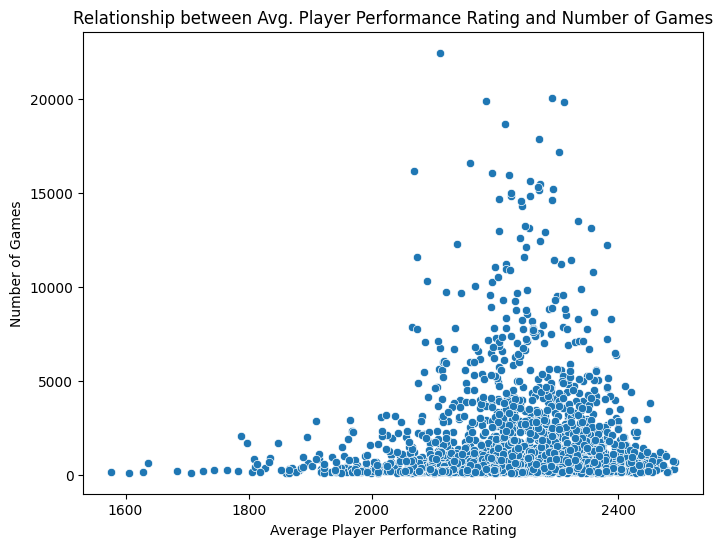

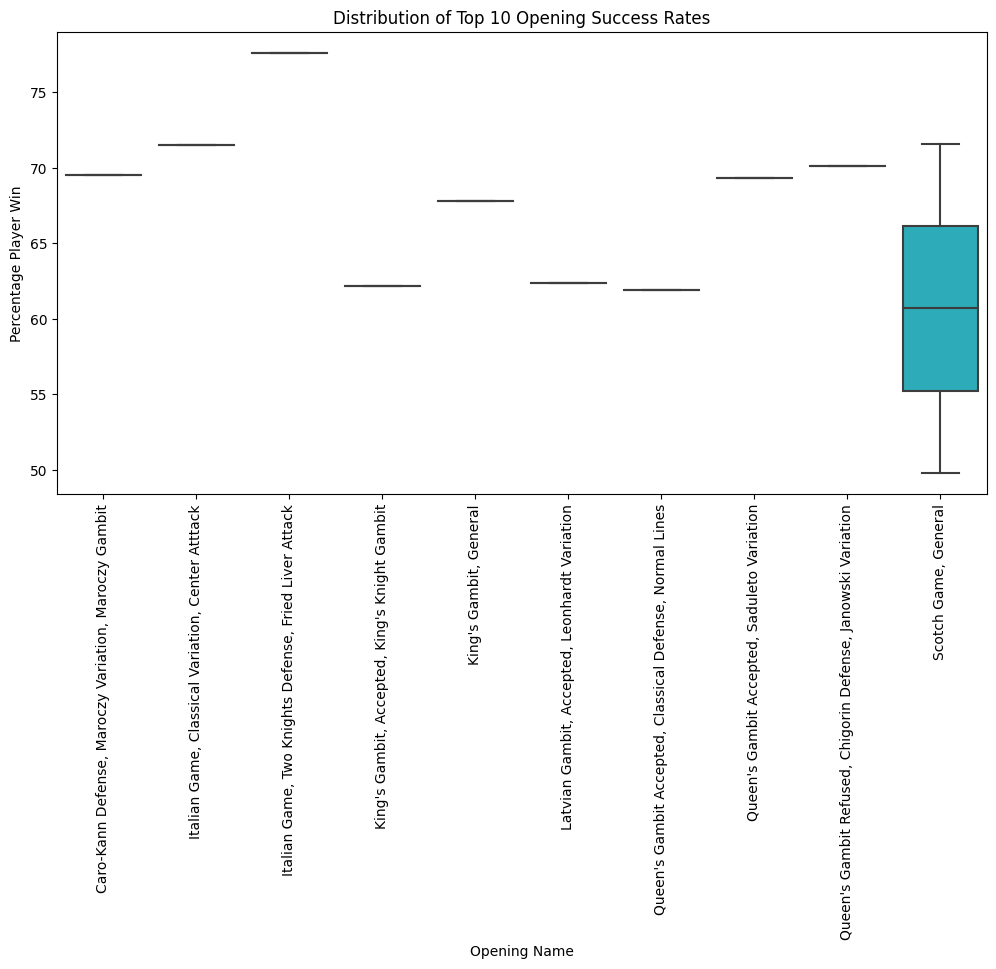

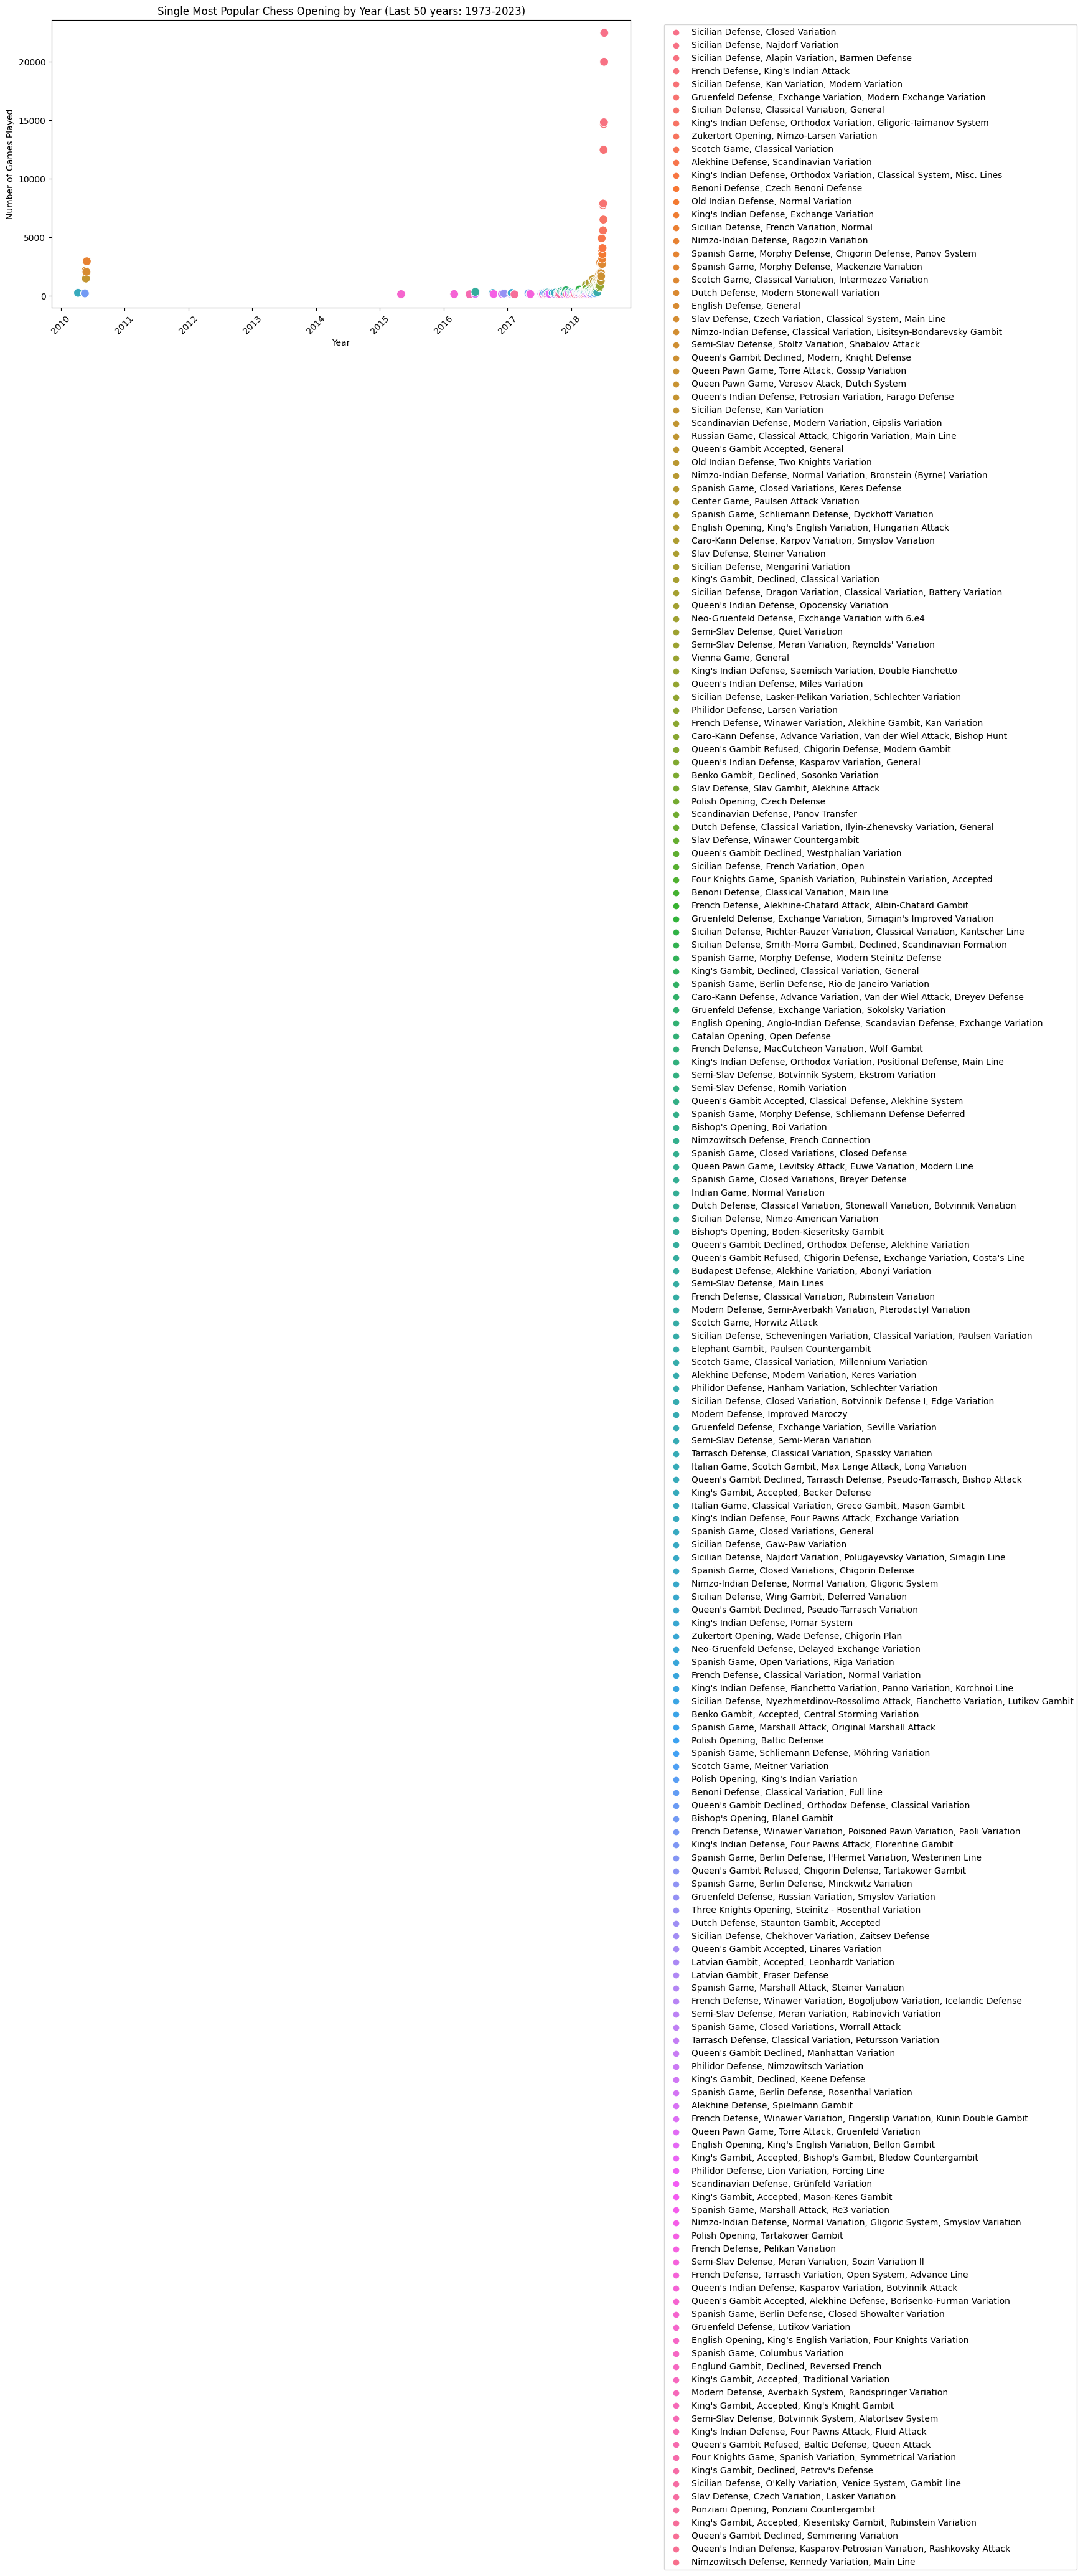

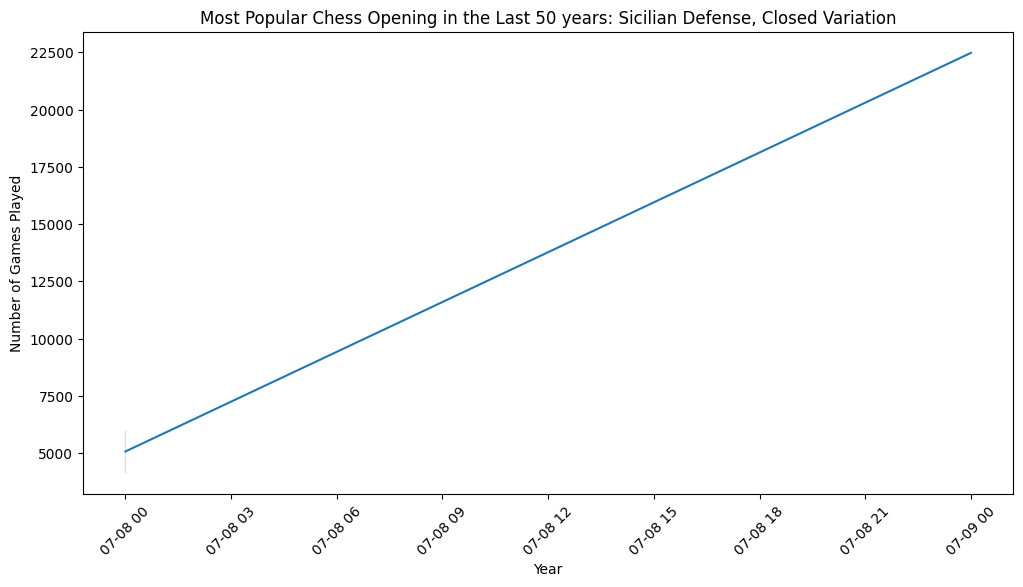

In [30]:
from datetime import datetime, timedelta

plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_player', y='num_games', data=df)
plt.title('Relationship between Avg. Player Performance Rating and Number of Games')
plt.xlabel('Average Player Performance Rating')
plt.ylabel('Number of Games')
plt.show()







# Sort openings by success rate in descending order
top_n = 10  # Set this to the number of top openings you want to display
top_openings = df.groupby('opening_name')['perc_player_win'].mean().nlargest(top_n).index.tolist()

# Filter the DataFrame to include only the top openings
filtered_df = df[df['opening_name'].isin(top_openings)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='opening_name', y='perc_player_win', data=filtered_df)
plt.title(f'Distribution of Top {top_n} Opening Success Rates')
plt.xlabel('Opening Name')
plt.ylabel('Percentage Player Win')
plt.xticks(rotation=90)
plt.show()










# Assuming 'last_played_date' is in string format, convert it to datetime
df['last_played_date'] = pd.to_datetime(df['last_played_date'])

# Calculate the current year and the year from 50 years ago
current_year = pd.Timestamp.now().year
start_year = current_year - 50

# Filter the data to include only the past 50 years
filtered_df = df[df['last_played_date'].dt.year >= start_year]

# Group the data by year and opening name, calculating the total number of games played for each opening in each year
opening_popularity_by_year = filtered_df.groupby(['last_played_date', 'opening_name'])['num_games'].sum().reset_index()

# Find the most popular opening for each year within the last 50 years
most_popular_openings_by_year = opening_popularity_by_year.loc[opening_popularity_by_year.groupby('last_played_date')['num_games'].idxmax()]

# Sort the openings by popularity in descending order
sorted_openings = most_popular_openings_by_year.sort_values('num_games', ascending=False)['opening_name'].unique()

# Create a scatter plot showing the single most popular opening for each year
plt.figure(figsize=(12, 6))
sns.scatterplot(x='last_played_date', y='num_games', hue='opening_name', data=most_popular_openings_by_year, s=100,
                hue_order=sorted_openings)
plt.title(f'Single Most Popular Chess Opening by Year (Last 50 years: {start_year}-{current_year})')
plt.xlabel('Year')
plt.ylabel('Number of Games Played')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()











# Assuming 'last_played_date' is in string format, convert it to datetime
df['last_played_date'] = pd.to_datetime(df['last_played_date'])

# Calculate the current year and the year from 50 years ago
current_year = pd.Timestamp.now().year
start_year = current_year - 50

# Filter the data to include only the past 50 years
filtered_df = df[df['last_played_date'].dt.year >= start_year]

# Group the data by opening name and calculate the total number of games played for each opening
opening_popularity = filtered_df.groupby('opening_name')['num_games'].sum().reset_index()

# Find the single most popular opening for the last 50 years
most_popular_opening = opening_popularity.loc[opening_popularity['num_games'].idxmax()]['opening_name']

# Filter the data to include only the games with the most popular opening
filtered_df = filtered_df[filtered_df['opening_name'] == most_popular_opening]

# Create the line plot with the single most popular opening
plt.figure(figsize=(12, 6))
sns.lineplot(x='last_played_date', y='num_games', data=filtered_df)
plt.title(f'Most Popular Chess Opening in the Last 50 years: {most_popular_opening}')
plt.xlabel('Year')
plt.ylabel('Number of Games Played')
plt.xticks(rotation=45)
plt.show()





# **Conclusion**

The comprehensive analysis of chess openings spanning the past five decades has brought to light the enduring and unparalleled popularity of the Sicilian Defense, Closed Variation. This opening has consistently stood out as the preferred choice among chess players, maintaining its reputation as a versatile and potent weapon on the chessboard. Its unwavering appeal can be attributed to several factors, including its adaptability to diverse game scenarios, its ability to foster complex tactical battles, and its capacity to confound opponents.

The Sicilian Defense, Closed Variation, has proven itself as a strategic cornerstone for chess players of all skill levels, from beginners to grandmasters. Its enduring presence suggests that it offers a solid foundation that empowers players to approach games with creativity and adaptability, making it a perennial favorite.

In light of this discovery, chess enthusiasts and competitors can draw inspiration from the Sicilian Defense, Closed Variation's storied success. It serves as a reminder that, in the world of chess, timeless strategies can coexist with innovation, fostering a rich and ever-evolving landscape of gameplay.

This project not only illuminates the past but also provides invaluable insights into the dynamic and evolving world of chess openings. By understanding the preferences and choices of players over the years, we gain a deeper appreciation for the enduring appeal of certain openings and the ever-shifting strategies that define the game of chess.

# **Kaggle Source**

https://www.kaggle.com/datasets/arashnic/chess-opening-dataset